<a href="https://colab.research.google.com/github/maalpi/Analisando-Historia-do-Nobel/blob/main/NobelAnalise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O Prémio Nobel está entre os prémios internacionais de maior prestígio desde 1901. Todos os anos, são atribuídos prémios em química, literatura, física, fisiologia ou medicina, economia e paz. Além da honra, do prestígio e da substancial premiação em dinheiro, o ganhador também ganha uma medalha de ouro com a imagem de Alfred Nobel (1833 - 1896), que instituiu o prêmio.

A Fundação Nobel disponibilizou um conjunto de dados de todos os vencedores do prêmio desde o início da premiação, de 1901 a 2023. O conjunto de dados usado neste projeto é da API do Prêmio Nobel e está disponível em nobel.csv.



In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('./sample_data/nobel.csv')
df

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Pegando o genero e a nacionalidade que mais vezes receberam o premio
top_gender = str(df[['sex']].value_counts().index[0][0])
top_country = str(df[['birth_country']].value_counts().index[0][0])
print('Gênero que mais conseguiu o premio: '+top_gender+' \nPaís que mais vezes teve vencedor: '+top_country)

Gênero que mais conseguiu o premio: Male 
País que mais vezes teve vencedor: United States of America


Decada que teve a maior porcentagem de vencedores do EUA: 2000


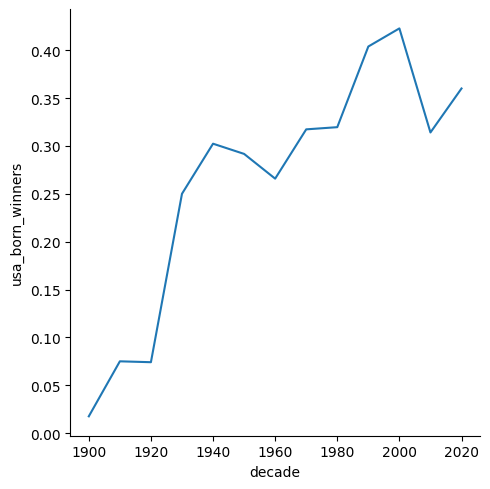

In [11]:
# Separando por decada e buscando em qual decada teve maior porcentagem de campeão americano


# Criando uma coluna só de true e false baseado nos anos q o EUA foi campeao
df['usa_born_winners'] = df['birth_country'] == 'United States of America'

# Criando a coluna decada, o np.floor é usado para arredondar para baixo, porque todo ano devidido por 10 fica ->1909/10 = 190,9. Arrendondando para baixo fica 190 e * 10 da igual a 1900, primeira decada.
df['decade'] = np.floor(df['year'] / 10) * 10
df['decade'] = df['decade'].astype(int) # Convertendo a string para int

# Criando um novo DF agrupado a partir da decada e com a % de vezes que os americanos ganharam por decada.
df_new = df.groupby('decade', as_index=False)['usa_born_winners'].mean()
# Pegando o maior valor
max_decade_usa = df_new[df_new['usa_born_winners'] == df_new['usa_born_winners'].max()]['decade'].values[0]
print('Decada que teve a maior porcentagem de vencedores do EUA: '+str(max_decade_usa))

sns.relplot(x='decade', y='usa_born_winners', data=df_new, kind='line');

{2020: 'Literature'}


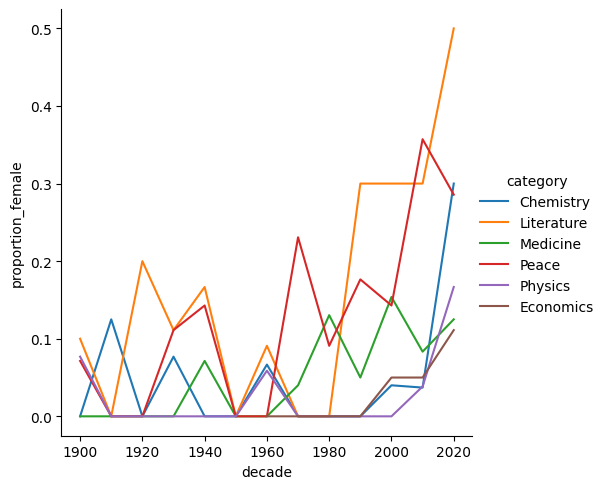

In [12]:
# Em qual decada teve a maior % de mulheres campeãs e em qual categoria foi

# Codigo semelhante ao anterior, porém vou adotar uma abordagem diferente
df['female_winner'] = df['sex'] == 'Female'
df_new_female = df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
df_new_female = df.groupby(['decade', 'category'])['sex'].apply(lambda x: (x == 'Female').mean()).reset_index(name='proportion_female')
df_new_female

max_female_dict = df_new_female.loc[df_new_female['proportion_female'].idxmax()]

max_female_decade = max_female_dict['decade']
max_female_category = max_female_dict['category']

max_female_dict = {max_female_decade: max_female_category}
print(max_female_dict)

sns.relplot(x='decade', y='proportion_female', data=df_new_female, hue='category', kind='line');

In [15]:
# Descobrindo quem foi a primeira mulher a ganhar e em que categoria foi

# Criando um novo dataframe apenas com as mulheres e dando ordenando por Anos
df_woman_win = df[df['sex'] == 'Female'].set_index('year').sort_index()
# Pegando os dados da primeira linha depois de ordenado
first_woman_name = df_woman_win['full_name'].iloc[0]
first_woman_category = df_woman_win['category'].iloc[0]
print('Primeira mulher a ganhar: ' + first_woman_name + '\nFoi na categoria: ' + first_woman_category)

Primeira mulher a ganhar: Marie Curie, née Sklodowska
Foi na categoria: Physics


In [19]:
# Pegando as intituição ou pessoas que venceram duas ou mais vezes

repeat_winners = pd.DataFrame(df['full_name'].value_counts())
repeat_list = repeat_winners.query('count >= 2').index.tolist()
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']